# Detection of Parkinson Disease

In [69]:
#importing necessary libraries
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression  
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mtp

In [30]:
#Reading data sets
df=pd.read_csv('E:\Dataset\parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [31]:
#Getting features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values
print(features)

[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [32]:
#print all the labels
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [33]:
#Count the number of each labels (either 0 or 1)
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [34]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [35]:
#Spliting the dataset into train and test data (keeping test data as 20%# DataFlair - Calculate the accuracy
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

# XGBoost Classifier

In [36]:
#Train the modelby XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)

[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Shalu\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#Calculate the accuracy of XGB Classifier Model
xgb_y_pred=xgb_model.predict(x_test)
print("Accuracy of XGB Classifier:", accuracy_score(y_test, xgb_y_pred)*100)

Accuracy of XGB Classifier: 94.87179487179486


In [83]:
# Classification of test data and XGB predictions
print("XGB Classifier Classification report: ")
print(classification_report(y_test,xgb_y_pred))

XGB Classifier Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



# Logistic Classifier

In [39]:
#Train the model by Logistic Regression Classifier
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [40]:
#Calculate the accuracy of Logistic Regression Model
logistic_y_pred=logistic_model.predict(x_test)
print("Accuracy of Logistic Regression:", accuracy_score(y_test, logistic_y_pred)*100)

Accuracy of Logistic Regression: 87.17948717948718


In [72]:
# Classification of test data and logistic predictions
print("Logistic Classifier Classification Report: ")
print(classification_report(y_test, logistic_y_pred))

Logistic Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [41]:
# Confusion matrix of test data and Logistic predictions
print("Logistic Regression Confusion Matrix: ")
logistic_confusion_matrix = confusion_matrix(y_test, logistic_y_pred)
print(logistic_confusion_matrix)

Logistic Regression Confusion Matrix: 
[[ 4  3]
 [ 2 30]]


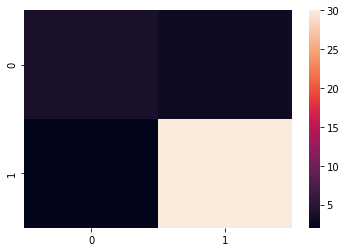

In [46]:
#Logistic Confusion Matrix Heatmap
sns.heatmap(logistic_confusion_matrix)
pyplot.show()

# K-Nearest Neighbors

In [55]:
#Train the model by K-NN Classifier 
KNN_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN_model.fit(x_train, y_train)  

KNeighborsClassifier()

In [56]:
#Calculate the accuracy of KNN Model
KNN_y_pred=KNN_model.predict(x_test)
print("Accuracy of KNN:", accuracy_score(y_test, KNN_y_pred)*100)

Accuracy of KNN: 97.43589743589743


In [75]:
# Classification of test data and logistic predictions
print("Classification report: ")
print(classification_report(y_test,KNN_y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



In [76]:
# Confusion matrix of test data and KNN predictions
print("KNN Confusion Matrix: ")
KNN_confusion_matrix = confusion_matrix(y_test, KNN_y_pred)
print(KNN_confusion_matrix)

KNN Confusion Matrix: 
[[ 6  1]
 [ 0 32]]


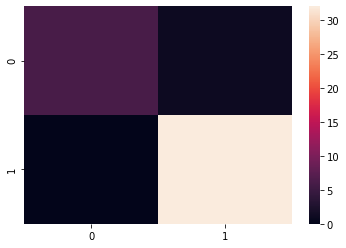

In [69]:
#KNN Confusion Matrix Heatmap
sns.heatmap(KNN_confusion_matrix)
pyplot.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


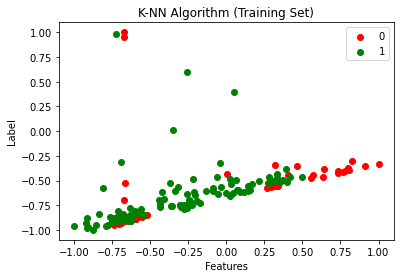

In [81]:
#visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
for i,j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('Red','Green'))(i), label = j)
mtp.title("K-NN Algorithm (Training Set)")
mtp.xlabel("Features")
mtp.ylabel("Label")
mtp.legend()
mtp.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


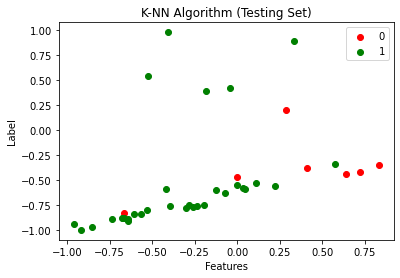

In [82]:
#visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
for i,j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('Red','Green'))(i), label = j)
mtp.title("K-NN Algorithm (Testing Set)")
mtp.xlabel("Features")
mtp.ylabel("Label")
mtp.legend()
mtp.show()

# Support Vector Classifier

In [64]:
##Train the model by SV Classifier 
from sklearn.svm import SVC   
SVC_model = SVC(kernel='linear', random_state=0)  
SVC_model.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [65]:
#Calculate the accuracy of SVC Model
SVC_y_pred=SVC_model.predict(x_test)
print("Accuracy of SVC:", accuracy_score(y_test, SVC_y_pred)*100)

Accuracy of SVC: 89.74358974358975


In [77]:
# Classification of test data and SVC predictions
print("SVC Classifier Classification Report: ")
print(classification_report(y_test, SVC_y_pred))

SVC Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



In [78]:
# Confusion matrix of test data and SVC predictions
print("SVC Confusion Matrix: ")
SVC_confusion_matrix = confusion_matrix(y_test, SVC_y_pred)
print(SVC_confusion_matrix)

SVC Confusion Matrix: 
[[ 4  3]
 [ 1 31]]


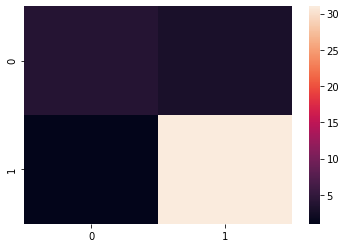

In [79]:
#SVC Confusion Matrix Heatmap
sns.heatmap(SVC_confusion_matrix)
pyplot.show()